
# Grundlagen / Datenbasis / Visualisierung der Daten

### Praktische Untersuchungen zur Beschreibung und Visualisierung der Arbeitsdaten

**Zeitraum der aufgezeichneten Log-Einträge**
Mo, 12.10.2020 bis Do, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [23]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [24]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [25]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [26]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [27]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [28]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Datentypen der Tabellenmerkmale

In [29]:
# Integers werden von pandas standardmäßig als int64 interpretiert.
# Strings werden von pandas standardmäßig als object interpretiert.
display(moodle_data.dtypes)

courseid                       int64
Studiengang                   object
userid                         int64
relateduserid                  int64
action                        object
eventname                     object
objecttable                   object
objectid                       int64
timecreated           datetime64[ns]
course_module_type            object
instanceid                     int64
dtype: object

### Ausgabe der Mengen unterschiedlicher Werte pro Tabellenmerkmal

In [30]:
display(moodle_data.nunique())

courseid                 579
Studiengang                5
userid                   142
relateduserid            145
action                    42
eventname                228
objecttable               69
objectid              172056
timecreated           383508
course_module_type        29
instanceid              4372
dtype: int64

### Ausgabe der Mengen an Log-Einträgen im Untersuchungszeitraum

In [31]:
# Ausgabe statistischer Werte für das Tabellenmerkmal timecreated
display(moodle_data.timecreated.describe(datetime_is_numeric=True))  # Daten müssen für diese Ausgabe als datetime typisiert sein.

count                           900141
mean     2021-02-06 10:09:52.370403328
min                2020-10-12 03:54:58
25%                2020-12-10 07:13:59
50%                2021-01-30 22:10:15
75%                2021-04-10 02:55:26
max                2021-06-03 22:38:39
Name: timecreated, dtype: object

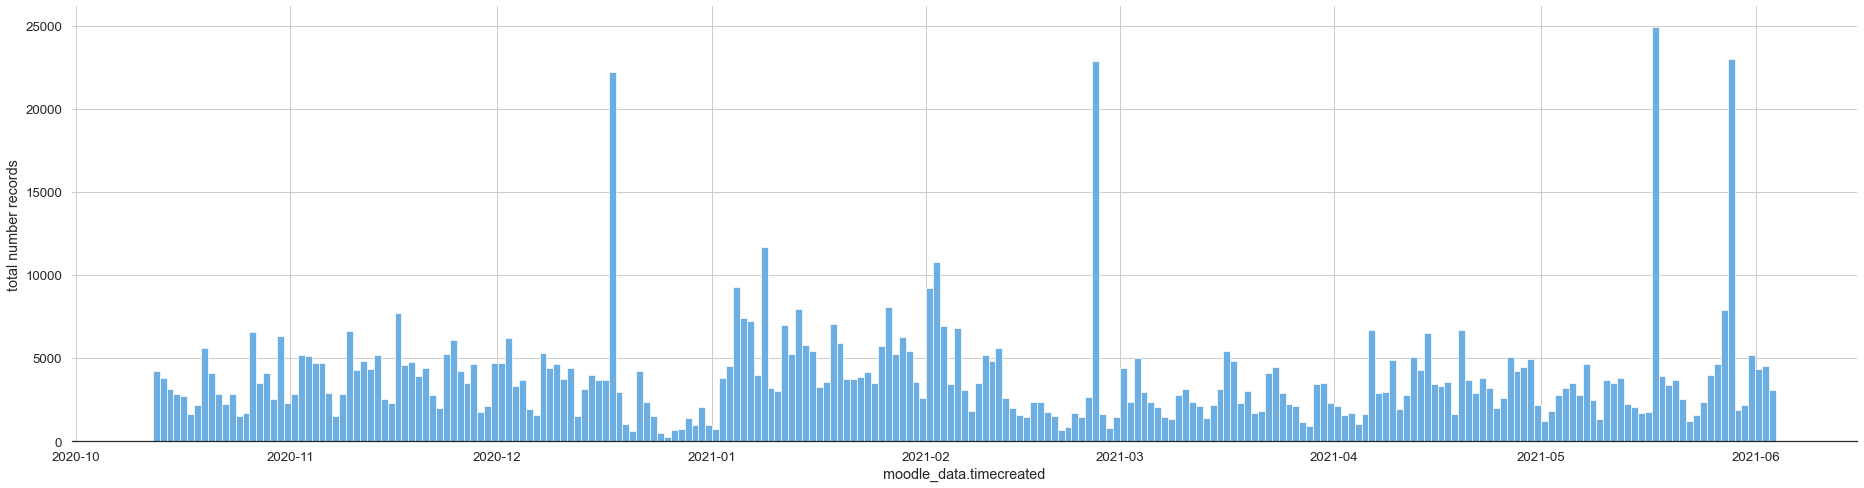

In [32]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Mengen an Log-Einträgen über 8 Monate (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated, bins=8, color='#5FA4D2', alpha=1)

# Visualisierung der Mengen an Log-Einträgen über 34 Wochen (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated, bins=34, color='#5FA4D2', alpha=1)

# Visualisierung der Mengen an Log-Einträgen über 235 Tage (Gesamtzeitraum)
chart = sns.histplot(data=moodle_data.timecreated, bins=235, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro userid

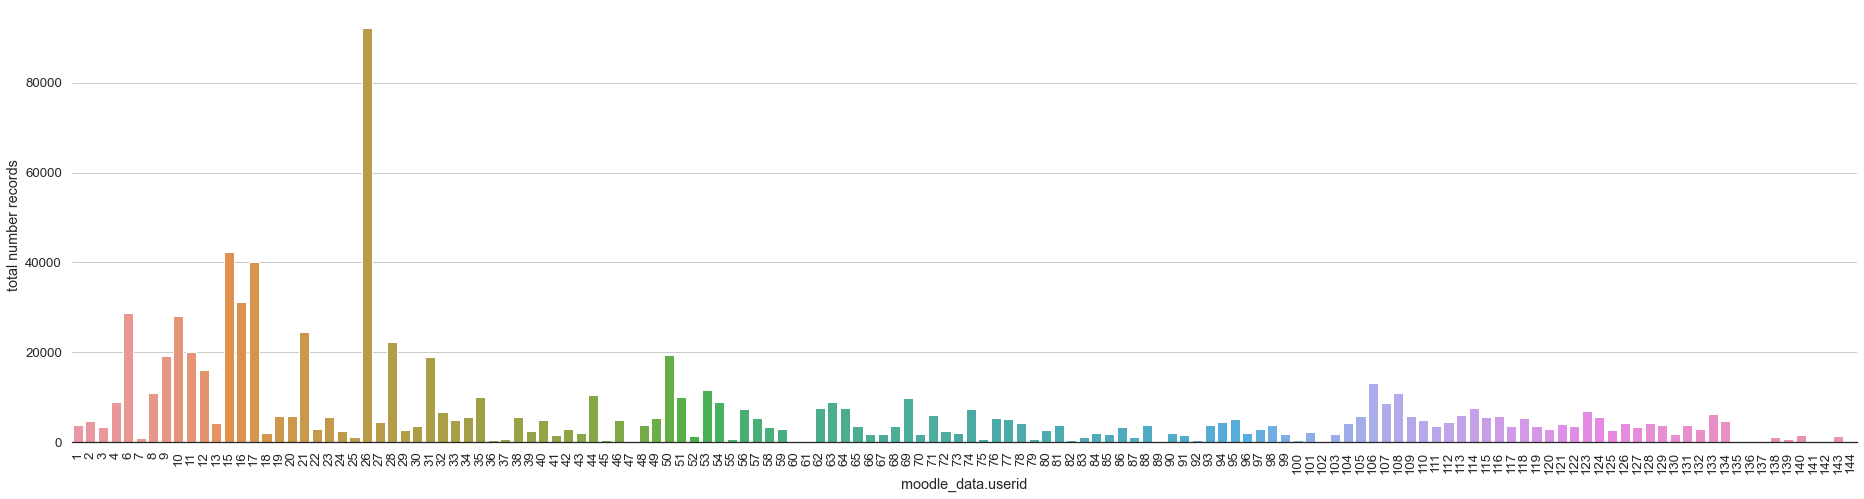

In [33]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Mengen an Log-Einträgen pro userid
chart = sns.countplot(x=moodle_data.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Zeitpunkte der Log-Einträge pro userid

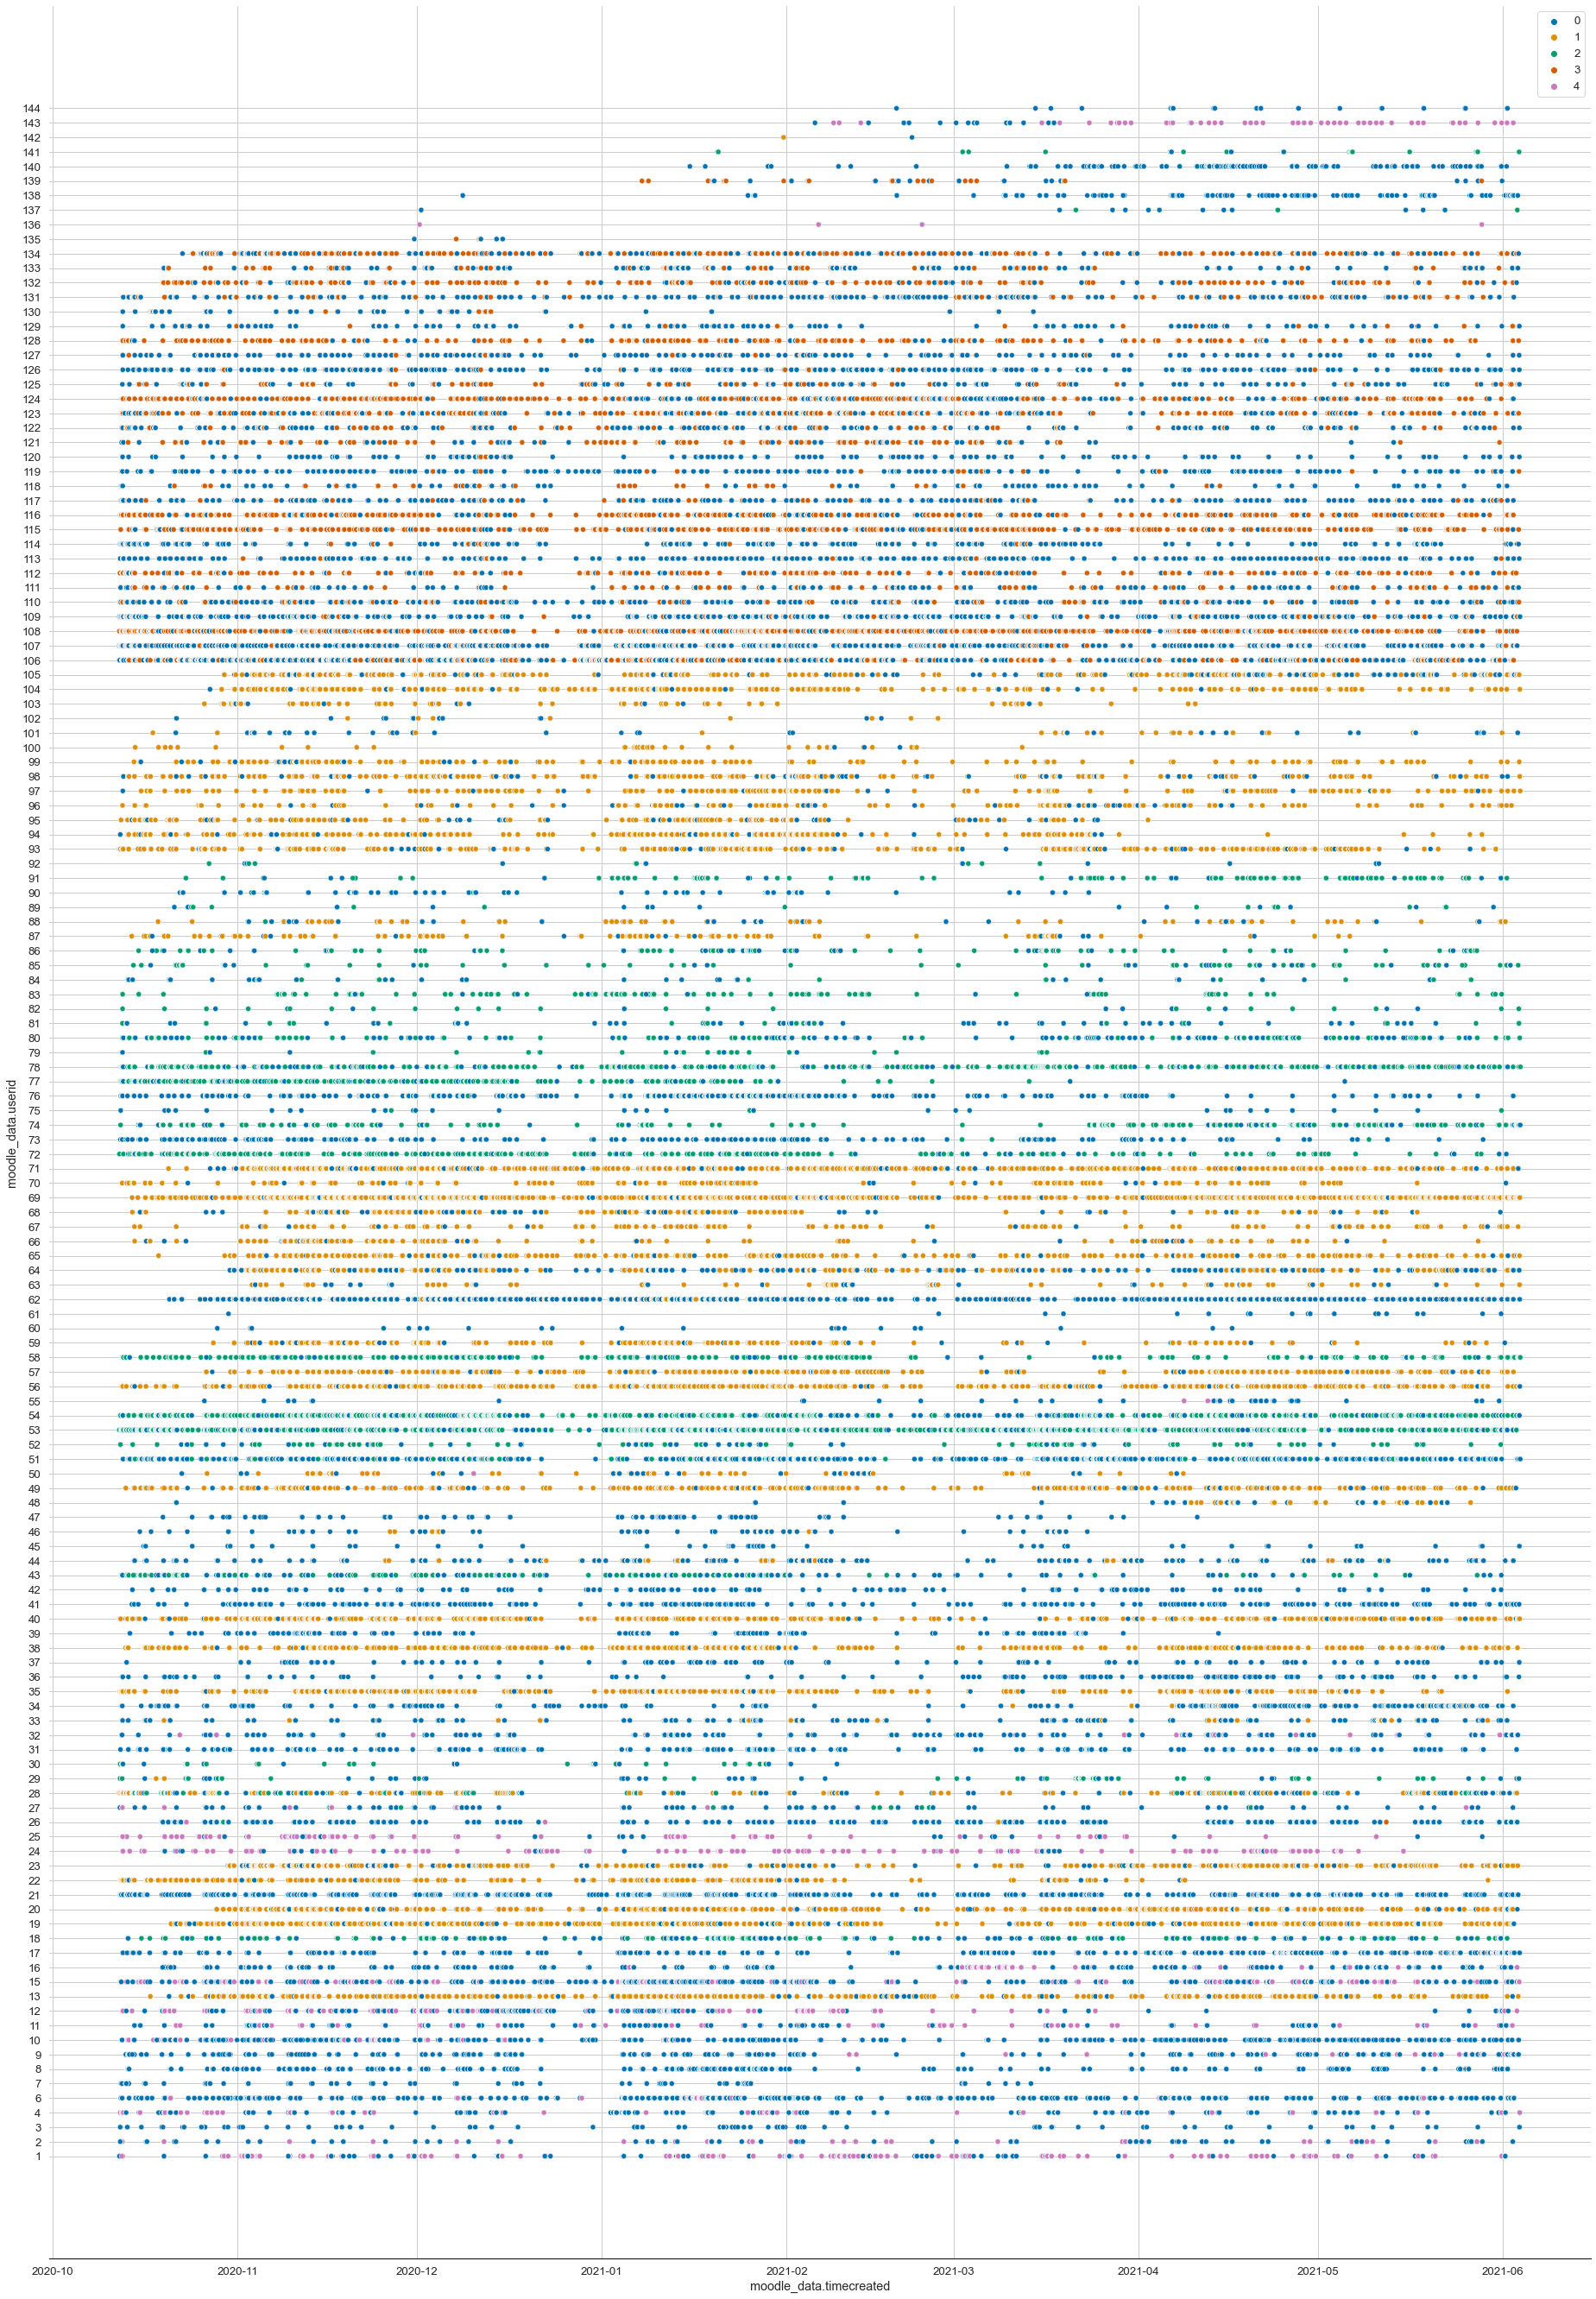

In [34]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 48)) # Größe der Visualisierung (in inch)

# Visualisierung der Zeitpunkte der Log-Einträge pro userid
chart = sns.scatterplot(x=moodle_data.timecreated, y=moodle_data.userid.astype(str), hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='colorblind')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('moodle_data.userid')
chart.invert_yaxis()
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Kursen pro userid

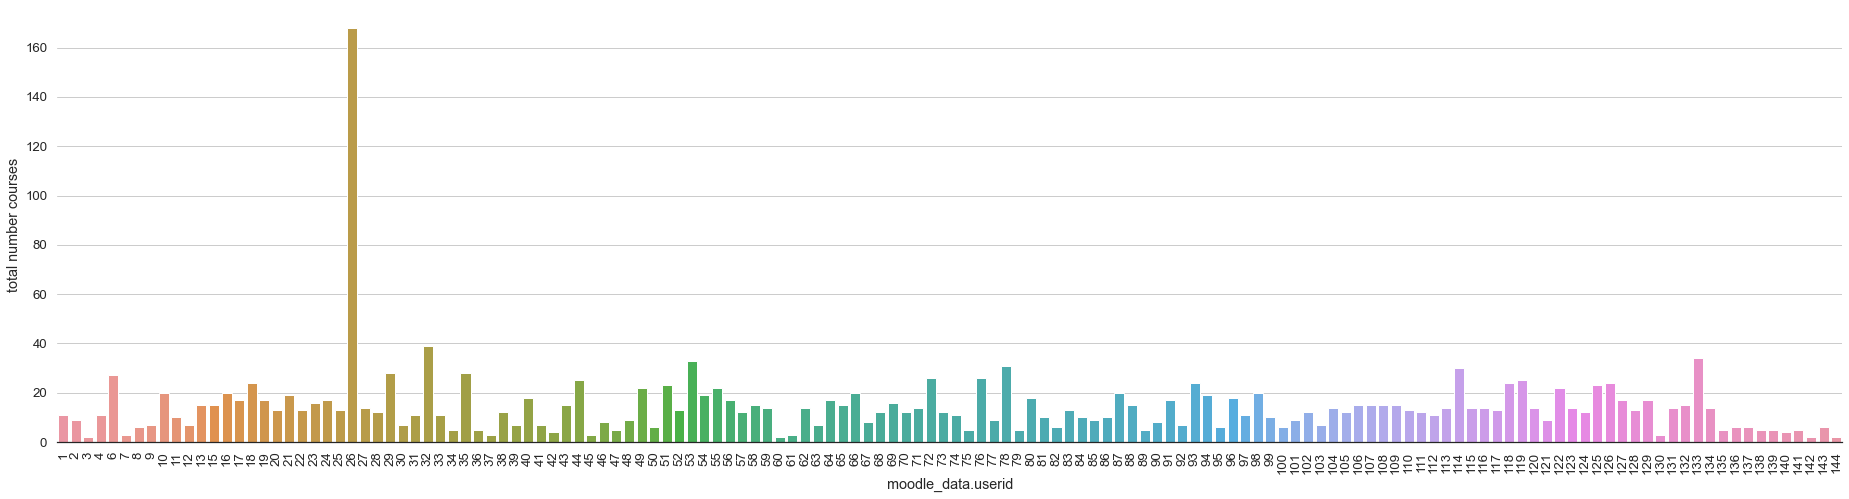

In [35]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Kursen pro userid
result = moodle_data.courseid.groupby(moodle_data.userid).nunique()
# Visualisierung der Mengen an Kursen pro userid
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number courses')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Anzahlen von Kursmengen

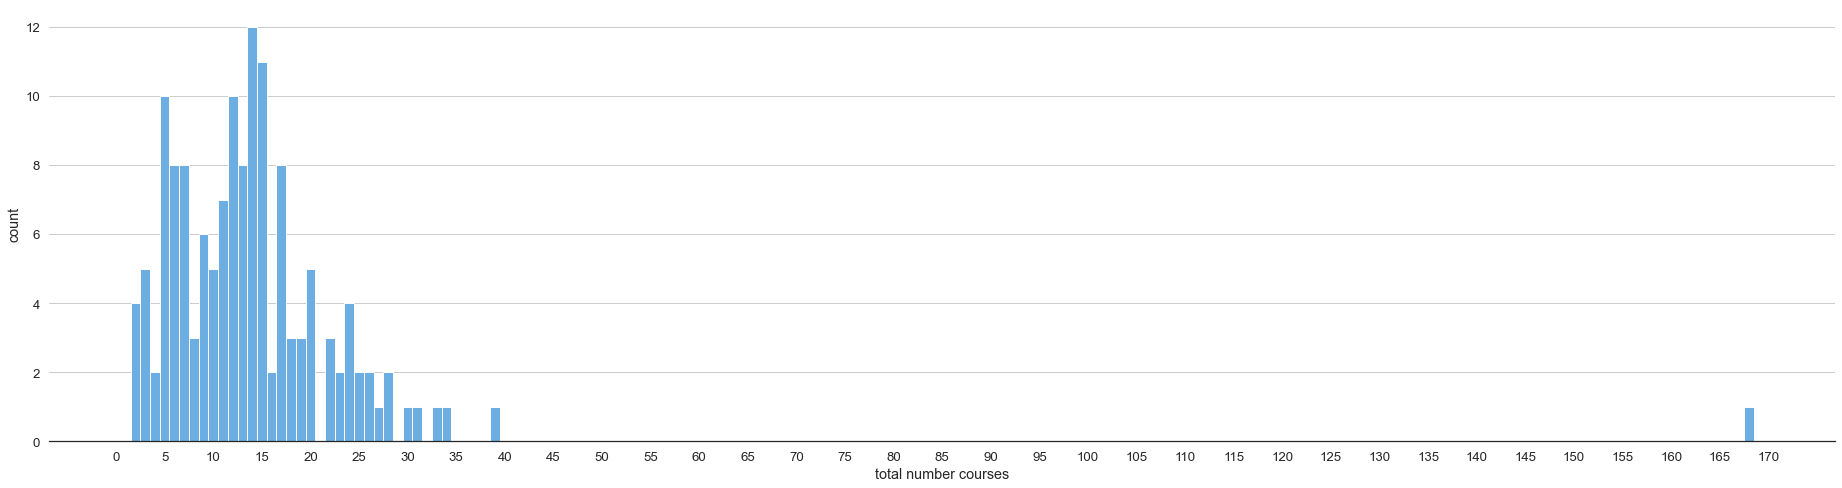

In [36]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Anzahlen von Kursmengen
result = moodle_data.courseid.groupby(moodle_data.userid).nunique()
# Visualisierung der Anzahlen von Kursmengen
chart = sns.histplot(data=result, bins=171, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 171, 5))
chart.tick_params(left=False, bottom=False)
chart.set_xlabel('total number courses')
chart.set_ylabel('count')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()